In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import plotly.express as px
from datetime import datetime as dt, timedelta
import requests
from urllib.parse import urlencode

Проект e-commerce: вариант 1 
Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:
1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 
2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)
3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)
4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать,
что внутри месяца может быть не целое количество недель.
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 
5. Напиши функцию на python, позволяющую строить когортный анализ.
В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут.
(10 баллов)
6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M 
(и опиши подробно, как были построены метрики R, F, M). Описание подхода можно найти тут. (35 баллов)

In [ ]:
#users_public_key = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
#orders_public_key = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'
#items_public_key = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'

In [ ]:
#def get_yandex_download_url(public_key):
    #base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    #final_url = base_url + urlencode(dict(public_key=public_key))
    #response = requests.get(final_url)
    #download_url = response.json()['href']
    #return download_url

In [ ]:
df_olist_customers   = pd.read_csv('olist_customers_dataset.csv')
df_olist_orders      = pd.read_csv('olist_orders_dataset.csv')
df_olist_order_items = pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
df_olist_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df_olist_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Вопрос № 1
Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [ ]:
df_olist_orders_one_purchase = df_olist_orders \
    .query('order_status != "canceled" and order_status != "unavailable"')

In [ ]:
df_customer_unique_id = df_olist_customers.merge(df_olist_orders_one_purchase, how='left', on='customer_id')

In [ ]:
df_all_one_pay = df_customer_unique_id \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'count'}) \
    .sort_values('order_approved_at', ascending=False)

In [ ]:
df_all_one_pay['order_approved_at'].value_counts()

1     92087
2      2650
0      1123
3       188
4        29
5         9
6         5
7         3
16        1
9         1
Name: order_approved_at, dtype: int64

Ответ: 92087 пользователей совершили одну покупку.

Задание № 2
Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

In [ ]:
df_olist_orders['order_purchase_timestamp'] = pd.to_datetime(df_olist_orders.order_purchase_timestamp)

In [ ]:
df_olist_orders_canceled = df_olist_orders \
    .query('order_status == "canceled" or order_status == "unavailable"')
df_olist_orders_canceled

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [ ]:
not_delivered_orders_by_month = (df_olist_orders_canceled.groupby(['order_status', pd.Grouper(key='order_purchase_timestamp', freq='1M')])['order_status']
        .count()
        .rename_axis(['order_status_count', 'order_purchase_timestamp'])
        .reset_index())

In [ ]:
not_delivered_orders_by_month = pd.DataFrame(not_delivered_orders_by_month)

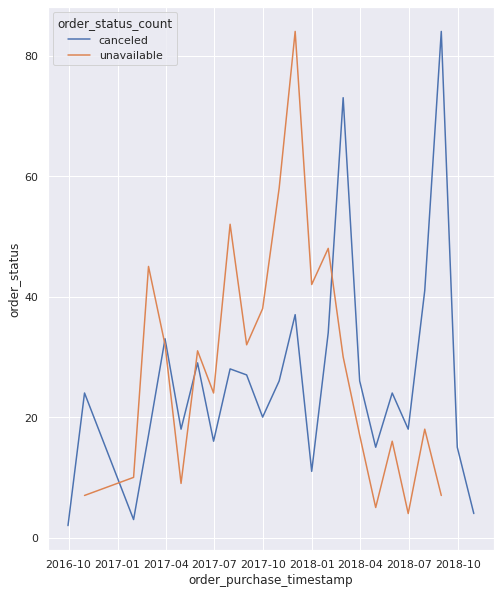

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="order_purchase_timestamp",
             y="order_status",
             hue="order_status_count",
             data=not_delivered_orders_by_month)
plt.rcParams['figure.figsize']=(8,10)

In [ ]:
df_canceled = not_delivered_orders_by_month.query('order_status_count == "canceled"')
df_canceled.order_status.count()

24

In [ ]:
df_unavailable = not_delivered_orders_by_month.query('order_status_count == "unavailable"')
df_unavailable.order_status.count()

21

In [ ]:
df_not_delivered_orders = not_delivered_orders_by_month.query('order_status_count == "unavailable" or order_status_count == "canceled" ')
df_not_delivered_orders.mean()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


order_status    27.422222
dtype: float64

Ответ: В среднем не доставляется 27.4 заказа в месяц из которых  доля отмененных 0.53, а недоступных 0.46.

Задание № 3
По каждому товару определить, в какой день недели товар чаще всего покупается.

In [ ]:
df_olist_orders_delivered = df_olist_orders \
    .query('order_status != "canceled" and order_status != "unavailable"')

In [ ]:
df_items_and_purchase_date  = df_olist_orders_delivered.merge(df_olist_order_items, how='left', on='order_id')

In [ ]:
df_items_and_purchase_date['order_approved_at'] = pd.to_datetime(df_items_and_purchase_date.order_approved_at)

In [ ]:
df_olist_order_items_day = df_items_and_purchase_date \
        .groupby(['product_id', pd.Grouper(key='order_approved_at', freq='D')])['price'] \
        .count() \
        .reset_index()

In [ ]:
df_olist_order_items_day['Day_of_the_Week'] = pd.to_datetime(df_olist_order_items_day['order_approved_at']).dt.day_name()

In [ ]:
df_olist_order_items_day_result = df_olist_order_items_day \
    .groupby(['product_id', 'Day_of_the_Week'], as_index=[False, False]) \
    .agg({'price': 'sum'}) \
    .reset_index() \
    .sort_values('product_id', ascending=False) \
    .rename(columns={'price': 'product_count'}) \
    .pivot(index='product_id', columns='Day_of_the_Week', values='product_count') \
    .fillna(0)

In [ ]:
most_frequent_day_of_the_week_for_shopping = pd.DataFrame(df_olist_order_items_day_result.idxmax(axis="columns"))  \
    .reset_index() \
    .rename(columns={ 0 : 'Day_max_sales'})

In [ ]:
most_frequent_day_of_the_week_for_shopping

,product_id,Day_max_sales
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32721,fff6177642830a9a94a0f2cba5e476d1,Monday
32722,fff81cc3158d2725c0655ab9ba0f712c,Monday
32723,fff9553ac224cec9d15d49f5a263411f,Saturday
32724,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


Задание № 4
Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [ ]:
df_olist_orders_delivered = df_olist_orders \
    .query('order_status != "canceled" and order_status != "unavailable"')

In [ ]:
df_all = df_olist_customers.merge(df_olist_orders_delivered, how='left', on='customer_id')

In [ ]:
average_purchases_per_week = df_all[['customer_unique_id', 'order_approved_at', 'customer_id']]

In [ ]:
average_purchases_per_week.columns = ['customer_id', 'date_pay', 'number_of_purchases']

In [ ]:
average_purchases_per_week['date_pay'] = pd.to_datetime(average_purchases_per_week.date_pay)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
average_purchases_per_week['days_in_month'] = average_purchases_per_week['date_pay'].dt.days_in_month / 7

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
average_purchases_per_week['count'] = 1

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
average_purchases_per_week = average_purchases_per_week \
    .groupby('customer_id', as_index=False) \
    .agg({'count': 'sum', 'days_in_month' : 'mean'}) \
    .sort_values('count', ascending=True)

In [ ]:
average_purchases_per_week.columns = ['customer_id', 'number_of_purchases', 'weeks_in_month']

In [ ]:
average_purchases_per_week['number_of_purchases_in_week_mean'] = \
    average_purchases_per_week['number_of_purchases'] / average_purchases_per_week['weeks_in_month']

In [ ]:
average_purchases_per_week

,customer_id,number_of_purchases,weeks_in_month,number_of_purchases_in_week_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,1,4.428571,0.225806
63580,a926cfc9bc7b082335de50450f48eec9,1,4.285714,0.233333
63579,a926aae38267e7f54e67de9b5775d0a5,1,4.428571,0.225806
63578,a92605ec492805540520d3a73aaeeb6e,1,4.428571,0.225806
63577,a925c3e5df82fdc6082f1383d2834998,1,4.285714,0.233333
...,...,...,...,...
76082,ca77025e7201e3b30c44b472ff346268,7,4.265306,1.641148
37797,6469f99c1f9dfae7733b25662e7f1782,7,4.367347,1.602804
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,4.326531,1.617925
23472,3e43e6105506432c953e165fb2acf44c,9,4.222222,2.131579


Задание № 5 
Напиши функцию на python, позволяющую строить когортный анализ. В период с 
января по декабрь выяви когорту с самым высоким retention на 3-й месяц.

In [ ]:
df_price = df_olist_order_items \
        .groupby('order_id', as_index=False) \
        .agg({'price': 'sum'})

In [ ]:
df_all_clients = df_olist_orders.merge(df_olist_customers, how='outer', on='customer_id')
df_all_clients = df_all_clients.merge(df_price, how='outer', on='order_id')

In [ ]:
columns = ['customer_unique_id','order_approved_at', 'price']
df1     = pd.DataFrame(df_all_clients, columns=columns)

In [ ]:
df_to_work = df1.dropna() 

In [ ]:
df = df_to_work.rename(columns={'customer_unique_id': 'user_id',
                                 'order_approved_at': 'date',
                                             'price': 'revenue'
                                })

In [ ]:
df_to_work['order_approved_at'] = pd.to_datetime(df_to_work.order_approved_at)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def cohort_analysis(user_id, date, revenue): # Функция для когортного анализа
    series  = [user_id, date, revenue]
    df = pd.concat(series, axis=1)
    df['transaction_month'] = df['date'].astype('datetime64[M]')
    df['reg_month'] = df['date'].astype('datetime64[M]')
    user = df.groupby('user_id')['reg_month'].min().reset_index() # создаем переменную user с группировкой по юзеру и минимальной датой первого целевого действия
    min_date = df['transaction_month'].min() # создаем переменные с минимальным и максимальным месяцем для календаря
    max_date = df['transaction_month'].max()
    month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS')) # генерируем календарь со сменой названия столбца
    month.columns = ['month']
    user['key']  = 1 # создаем сурогатные ключи для джоина фреймов
    month['key'] = 1
    template = user.merge(month,on='key')[['user_id','reg_month','month']] # джойним фрейм user с календарем по сурогатным ключам будоляем столбец с ключами и сохраняем фрейм в template
    template = template[template['month'] >= template['reg_month']] # удаляем из template месяца где юзер еще не совершил целевое действие
    trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index() # создаем фрейм trans_month с группировкой по юзеру и сумме целевых действий
    trans_month.columns = ['user_id','month','revenue'] # переименовваем столбцы в trans_month для джоина по месяцу и юзеру
    report = template.merge(trans_month,on=['user_id','month'],how='left') # джойним фреймы template и trans_month по left, сохраняем все в переменную report
    report['active'] = (report['revenue'] > 0)*1 # создаем столбец active с активностью пользователя
    #retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean') # делаем сводную таблицу с индексами из дат первой покупки и столбец по месяцам
    report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int) # создаем столбец с лайфтаймом
    retention = report.pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean') # делаем сводную таблицу с индексами из дат первой покупки и столбецы с лайфтаймом
    return retention

In [ ]:
date    = df.date
user_id = df.user_id
revenue = df.revenue

In [ ]:
retention = cohort_analysis(user_id, date, revenue)

In [ ]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
reg_month,,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-10-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.003257,...,0.003257,0.000000,0.003257,0.0,0.006515,0.006515,0.0,0.0,0.0,NaN
2016-12-01,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN
2017-01-01,1.0,0.005571,0.002786,0.001393,0.004178,0.001393,0.004178,0.001393,0.001393,0.000000,...,0.001393,0.002786,0.004178,0.0,0.001393,0.000000,NaN,NaN,NaN,NaN
2017-02-01,1.0,0.002368,0.002368,0.001776,0.004144,0.001184,0.002368,0.001776,0.000592,0.001776,...,0.000592,0.000592,0.002368,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2017-03-01,1.0,0.004992,0.003456,0.003456,0.003456,0.001536,0.001536,0.003072,0.003072,0.001152,...,0.002304,0.000768,0.001536,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,1.0,0.006050,0.002161,0.001729,0.003025,0.002593,0.003457,0.002593,0.003457,0.001729,...,0.000864,0.001729,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,1.0,0.005336,0.004774,0.003931,0.003089,0.003370,0.004212,0.001404,0.002527,0.002808,...,0.002527,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004802,0.003521,0.003841,0.002561,0.003521,0.003841,0.002241,0.001280,0.002241,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ответ:
Самый высокий ретеншн на трейтий месяц в период с января по декабрь 0.003931

Задание № 6 
Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M
(и опиши подробно, как были построены метрики R, F, M).

In [ ]:
# Группируем чеки с агригацией по цене за единицу товара для получения суммы по чеку.
df_olist_order_items_prepared = df_olist_order_items \
        .groupby('order_id', as_index=False) \
        .agg({'price': 'sum'})

In [ ]:
# убираем заказы которые не были отменены или не доступны 
df_olist_orders_prepared = df_olist_orders \
    .query('order_status != "canceled" and order_status != "unavailable"')

In [ ]:
df     = df_olist_customers.merge(df_olist_orders_prepared, how='outer', on='customer_id')
df_all = df.merge(df_olist_order_items_prepared, how='outer', on='order_id')

In [ ]:
df = df_all[['customer_unique_id', 'order_id', 'price', 'order_approved_at']]

In [ ]:
df = df.dropna()

In [ ]:
df['order_approved_at'] = pd.to_datetime(df.order_approved_at)

In [ ]:
# сумма покупки, последние покупки, количество покупок.
cust = df \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'price': 'sum',
         'order_approved_at':'max',
         'order_id':'nunique'
         })

In [ ]:
# Определляем дату последней покупки и добавляем к ней один день.
obs_date = (max(cust['order_approved_at']) + timedelta(days=1))
# Посчитаем количество дней с последней покупки.
cust['days_since_last_purchase'] = cust['order_approved_at'] \
    .apply(lambda x: obs_date - x)

In [ ]:
# Переведем получившийся ранее результат в дни и округлим его и переведем в int
cust['days_since_last_purchase'] = cust['days_since_last_purchase'] \
    .dt.days \
    .round() \
    .astype(int)

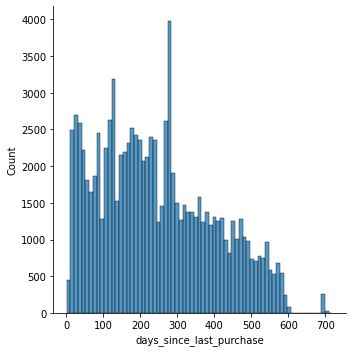

In [ ]:
# Строим распределиние количества дней с последней покупки.
# График говорит нам о том что очень много пользователей делала покупки единожды.
# Каждый раз у нас вновь прибывшие пользавотели делают покупку и не возвращаются.
sns.displot(cust['days_since_last_purchase'])

In [ ]:
# Cкоры для recency.
# При определинии скоров мы должны представлять как часто покупатель будет нуждаться в наших услугах.
# Мы не знаем что за товары мы продаем но по графику можно сказать что это тавары разовой необходимости и временной промежуток 
# должен быть большего размера.
# Так же можно предположить что у нас что-то не так с товаром т.к пользователи не возвращаются для повторной покупки.
# Но количество товаров купленных в последнее время увеличилосью.
# Разбитие на скоры я произвел по трем плато хотя достоверно понять кто из пользователей является оттовыми не очевидно
# так же и пользаватели купившие недавно не имеют пика который должен присутствотать т.к. там присутствуют пользователи которые 
# только пришли в стор и пользователи которые совершили повторные покупки.
def recency_score(recency):
    if recency <= 250:
        return 3
    elif (recency > 250) and (recency <= 400):
        return 2
    else:
        return 1
cust['recency'] = cust['days_since_last_purchase'].apply(recency_score)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


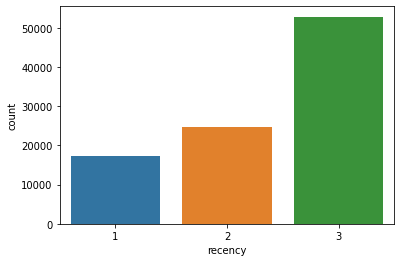

In [ ]:
sns.countplot(cust.recency)

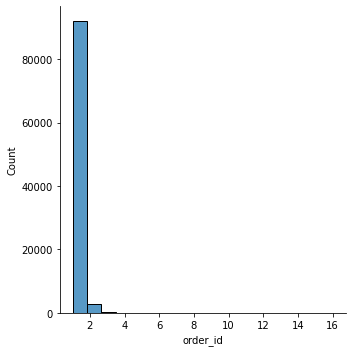

In [ ]:
sns.displot(cust[cust['order_id']<20]['order_id'])

In [ ]:
# Скоры для Frequency.
# Здесь мы достоверно видим что количество покупок почти у всех пользователей равно 1.
# Это говорит о том что наши товары не требуют быстрого обновления.
# Разбиение на скоры.
def frequency_score(freq):
    if freq <= 1:
        return 1
    elif (freq > 1) and (freq <= 3):
        return 2
    else:
        return 3
cust['frequency'] = cust['order_id'].apply(frequency_score)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


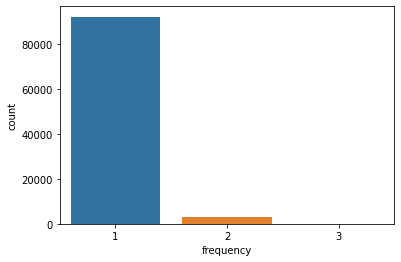

In [ ]:
sns.countplot(cust['frequency'])

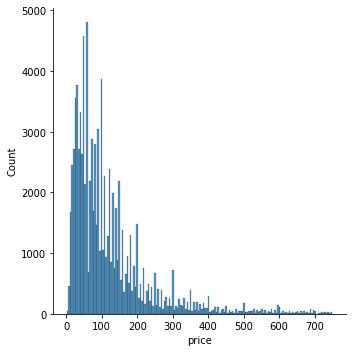

In [ ]:
sns.displot(cust[cust['price']<750]['price'])

In [ ]:
# Скоры для monetary valye.
# В распределении суммы покупки наблюдается пик в районе 50 далее меделенно снизающиеся показатели с 150 до 300 и после есть
# большое плато с покупками свыше 400 относительно этих наблюдений и делаем разбивку по сегментам.
def monetary_score(mon):
    if mon <=150:
        return 1
    elif (mon > 150) and (mon <= 400):
        return 2
    else:
        return 3
cust['monetary'] = cust['price'].apply(monetary_score)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


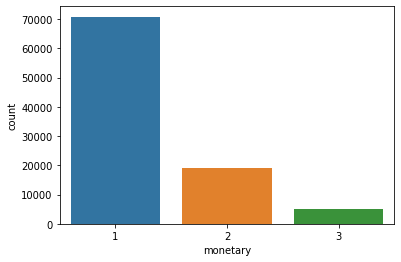

In [ ]:
sns.countplot(cust['monetary'] )

In [ ]:
cust['rfm_segment'] = cust.apply(lambda x: str(x['recency']) \
                                         + str(x['frequency']) \
                                         + str(x['monetary']), axis=1)

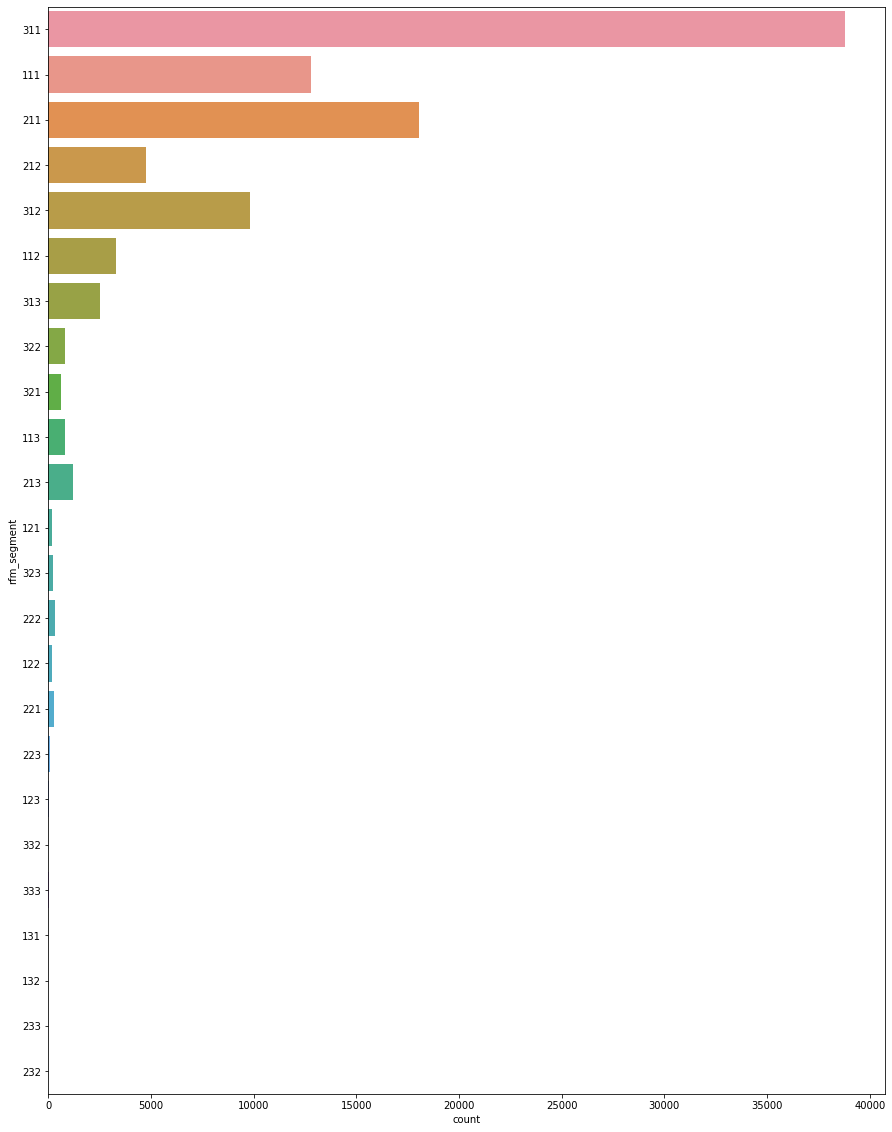

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(y=cust['rfm_segment'])

In [ ]:
# Автоматический RFM

In [ ]:
file_for_RFM = cust[['customer_unique_id', 'order_approved_at', 'price']]

In [ ]:
file_for_RFM = file_for_RFM.rename(columns={'customer_unique_id': 'user_id',
                                             'order_approved_at': 'order_date',
                                                         'price': 'order_value'
                                           })

In [ ]:
file_for_RFM.to_csv('file_for_RFM.csv', sep=',', encoding = 'utf-8', index=False)

In [ ]:
RFM = pd.read_csv('some_unique_name_mapping.csv')

In [ ]:
RFM['rfm_segment'] = RFM.apply(lambda x: str(x['recency']) \
                                         + str(x['frequency']) \
                                         + str(x['monetary']), axis=1)

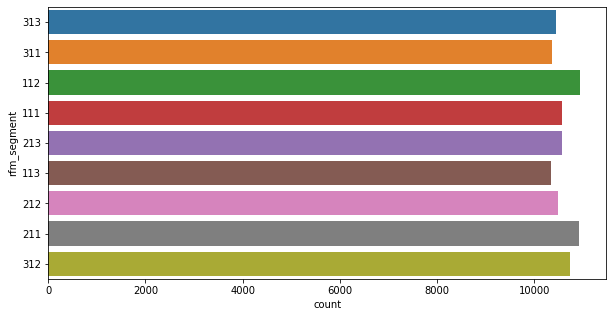

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=RFM['rfm_segment'])